# Genomika porównawcza
## Laboratorium 4

## Igor Filipiuk

Wybrać 10 taxonów (np. human, mouse, etc) i na podstawie czasów specjacji 
(median time, np. dla human vs. mouse jest 89 MYA) 
z timetree.org wygenerować macierz odległości. 
Następnie skontruować i narysować drzewo metodą UPGMA.

Najlepiej jeśli można zautomatyzować proces ściągania czasów specjacji 
(ale nie wiem czy da się zrobić w łatwy sposób).

In [1]:
import numpy as np

import networkx as nx 

import matplotlib.pyplot as plt

from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [2]:
taxons = [['Homo Sapiens'], 
['Pan Troglodytes'], 
['Pan Paniscus'], 
['Gorilla Gorilla'], 
['Pongo Pygmaeus'], 
['Hylobates lar'], 
['Papio Anubis'], 
['Macaca sylvanus'], 
['Alouatta guariba'], 
['Lemur catta'], 
['Cercopithecus diana'], 
['Saimiri oerstedii'], 
['Saimiri boliviensis'], 
['Tarsius spectrum']]

taxons_polish = [
    ["Człowiek"],
    ["Szympans"],
    ["Bonobo"],
    ["Goryl"],
    ["Orangutan"],
    ["Gibon Białoręki"],
    ["Pawian oliwkowy"],
    ["Makak berberyjski"],
    ["Wyjec brązowy"],
    ["Lemur katta"],
    ["Koczkodan Diany"],
    ["Central American squirrel monkey"],
    ["Black-capped squirrel monkey"],
    ["Wyrak upiorny"]
]

#Macierz odległości dla wybranych gatunkow naczelnych na pdst. timetree.org
x =[
[0, 6.4, 6.4, 8.6, 15.2, 19.8, 28.81, 28.81, 42.9, 
 74.1, 28.81, 42.9, 42.9, 69],
[6.4, 0, 2.396, 8.6, 15.2, 19.8, 28.81, 28.81, 42.9, 
 74.1, 28.81, 42.9, 42.9, 69],
[6.4, 2.396, 0, 8.6, 15.2, 19.8, 28.81, 28.81, 42.9, 
 74.1, 28.81, 42.9, 42.9, 69],
[8.6, 8.6, 8.6, 0, 15.2, 19.8, 28.81, 28.81, 42.9, 
 74.1, 28.81, 42.9, 42.9, 69],
[15.2, 15.2, 15.2, 15.2 ,  0 , 19.8 , 28.81 , 28.81 , 42.9 , 
 74.1 , 28.81 , 42.9 , 42.9 ,  69 ],
[19.8, 19.8, 19.8, 19.8 , 19.8 ,  0 , 28.81 , 28.81 , 42.9 , 
 74.1 , 28.81 , 42.9 , 42.9 ,  69 ],
[28.81, 28.81, 28.81, 28.81 , 28.81 , 28.81 ,  0 , 10.4 , 42.9 , 
 74.1 , 12.1 , 42.9 , 42.9 ,  69 ],
[28.81, 28.81, 28.81, 28.81 , 28.81 , 28.81 , 10.4 ,  0 , 42.9 , 
 74.1 , 12.1 , 42.9 , 42.9 ,  69 ],
[42.9, 42.9, 42.9, 42.9 , 42.9 , 42.9 , 42.9 , 42.9 ,  0 , 
 74.1 , 42.9 , 20.1 , 20.1 ,  69 ],
[74.1, 74.1, 74.1, 74.1 , 74.1 , 74.1 , 74.1 , 74.1 , 74.1 ,  
 0 , 74.1 , 74.1 , 74.1 , 74.1 ],
[28.81, 28.81, 28.81, 28.81 , 28.81 , 28.81 , 12.1 , 12.1 , 42.9 , 
 74.1 ,  0 , 42.9 , 42.9 ,  69],
[42.9, 42.9, 42.9, 42.9 , 42.9 , 42.9 , 42.9 , 42.9 , 20.1 , 
 74.1 , 42.9 ,  0 , 2.62 ,  69 ],
[42.9, 42.9, 42.9 , 42.9 , 42.9 , 42.9 , 42.9 , 42.9 , 20.1 , 
 74.1 , 42.9 , 2.62 ,  0 ,  69 ],
[69, 69,  69 ,  69 ,  69 ,  69 ,  69 ,  69 ,  69 , 
 74.1 ,  69 ,  69 ,  69 ,  0 ]
]


for i in range(len(x)):
    for j in range(len(x[0])):
        if i == j:
            x[i][j] = float('inf')
            
matrix = np.array([i[0::] for i in x[0::]])
taxons = taxons[0::]
#matrix = np.array(x)
#taxons = taxons

In [3]:
#Function adds edges of the tree according to the given distance matrix
#according to UPGAMA
def build_nodes(global_distance_matrix, global_taxon_names, 
                distance_matrix, taxon_names, nodes_to_draw = []):
    
    ind = np.unravel_index(np.argmin(distance_matrix, axis=None), 
                           distance_matrix.shape)
    
    node_taxons = [i for i in taxon_names 
                   if i not in [taxon_names[ind[0]], taxon_names[ind[1]]]]
    node_taxons.append(taxon_names[ind[0]] + taxon_names[ind[1]])
    
    for i in range(len(ind)):
        if len(taxon_names[ind[i]]) == 1:

            nodes_to_draw.append([taxon_names[ind[i]], 
                                  node_taxons[-1], 
                                  distance_matrix[ind[0],ind[1]]/2.0])
            
        else:
            for node in nodes_to_draw:
                if node[1] == taxon_names[ind[i]]:
                    
                    internal_length = 
                    global_distance_matrix[global_taxon_names.index(
                        [taxon_names[ind[i]][0]]), 
                        global_taxon_names.index([taxon_names[ind[i]][-1]])]
                    
                    nodes_to_draw.append([taxon_names[ind[i]], node_taxons[-1], 
                                          (distance_matrix[ind[0],ind[1]]/2.0) - 
                                          internal_length/2])
                    break
    
    return(nodes_to_draw)

#Function updates given matrix according to UPGAMA after new edge was added
def build_upgama_matrix(global_distance_matrix, 
                        global_taxons_names, distance_matrix, taxons_names):
    
    ind = np.unravel_index(np.argmin(distance_matrix, 
                                     axis=None), distance_matrix.shape)
    
    upgama_matrix = np.delete((np.delete(distance_matrix,
                                         [ind[0],ind[1]],0)),[ind[0],ind[1]],1)
    node_taxons = [i for i in taxons_names 
                   if i not in [taxons_names[ind[0]], taxons_names[ind[1]]]]
    node_taxons.append(taxons_names[ind[0]] + 
                       taxons_names[ind[1]])
    
    new_row = []
    for node in node_taxons[:-1]:
        result = 0
        count = -1
        
        for org in node:
            
            count += 1
            for last_org in node_taxons[-1]:
                count += 1
                result += (global_distance_matrix[global_taxons_names.index([org])]
                           [global_taxons_names.index([last_org])])
        new_row.append(result/count)
           
    new_column = np.array([[r] for r in new_row])
    new_row.append(float('inf'))
    
    upgama_matrix = np.append(upgama_matrix,new_column,axis=1)
    upgama_matrix = np.vstack((upgama_matrix,np.array(new_row)))
    
    return(upgama_matrix, node_taxons)

def build_tree(global_distance_matrix, global_taxons_names):
    dist_mat, tax_nams = global_distance_matrix, global_taxons_names
    
    for i in range(12):
        build_nodes(matrix, taxons, dist_mat, tax_nams)
        dist_mat, tax_nams = build_upgama_matrix(matrix, 
                                                 taxons, dist_mat, tax_nams)
    
    tree = build_nodes(matrix, taxons, dist_mat, tax_nams)
    return(tree)

In [31]:
phylo_tree = build_tree(matrix, taxons)

In [37]:
leaves = {}
for t in phylo_tree:
    if len(t[0]) == 1:
        leaves[''.join(t[0])] = t[0][0]
    else:
        leaves[''.join(t[0])] = ""

leaves[''.join(phylo_tree[-1][1])] = "ROOT"

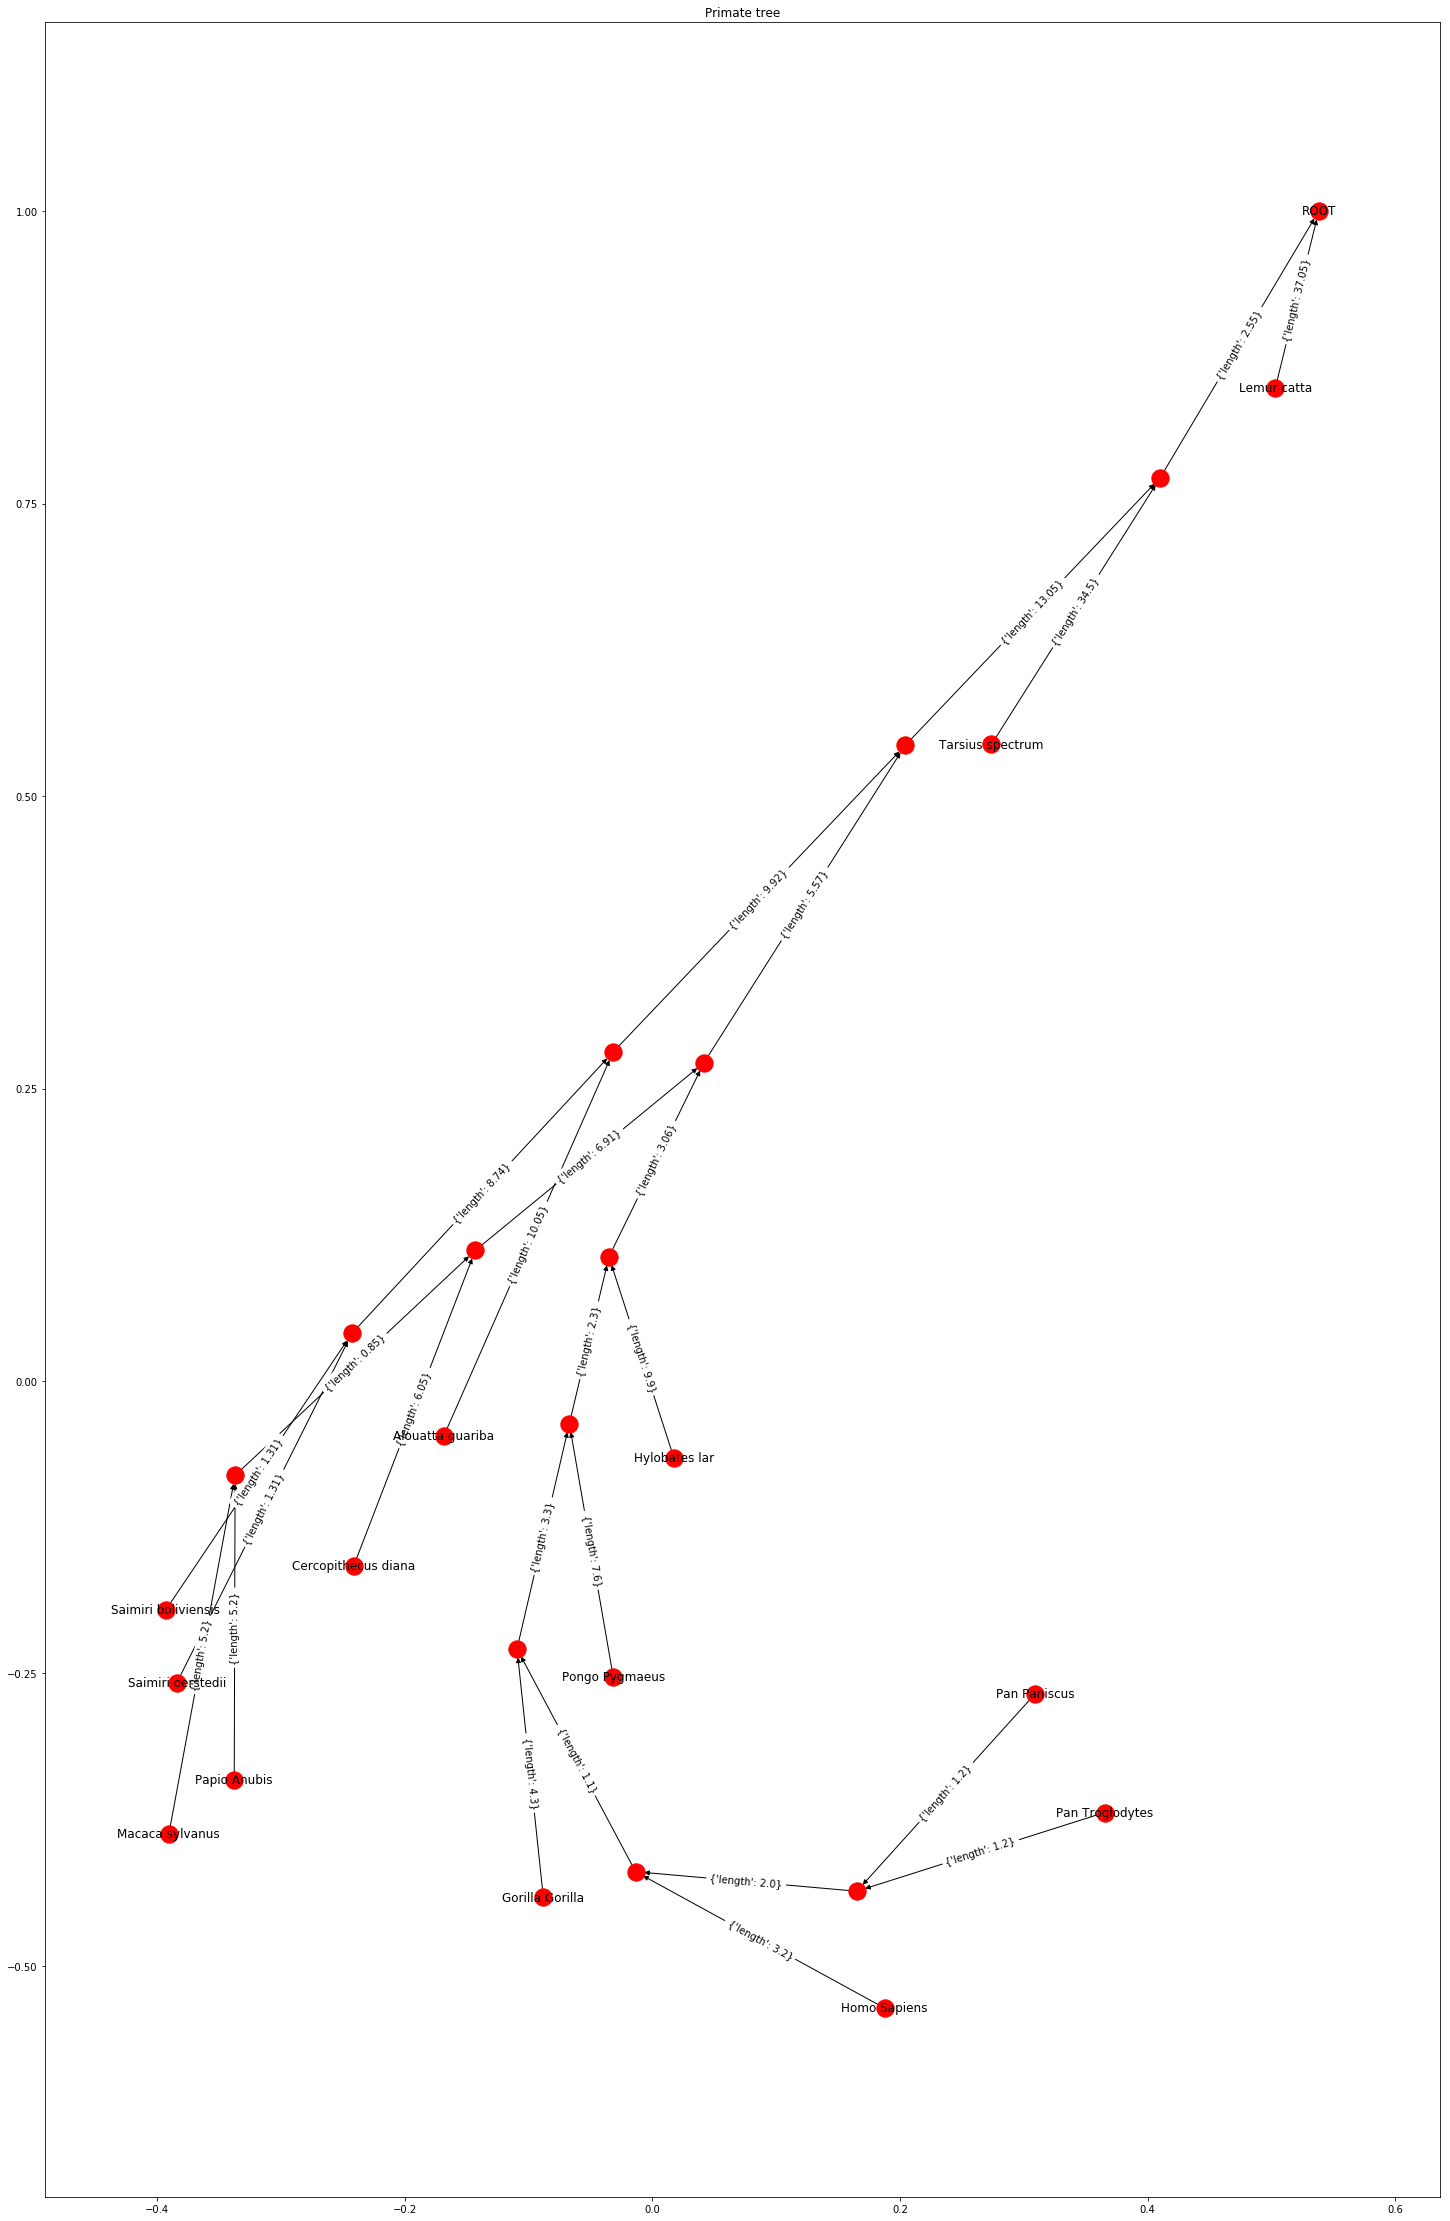

In [58]:
T = nx.DiGraph()

T.add_node(''.join(phylo_tree[-1][1]), color = 'blue', shape='square')

for t in phylo_tree:
    T.add_node(''.join(t[0]))
    T.add_edge(''.join(t[0]), ''.join(t[1]), length = round(t[2], 2))

plt.figure(figsize=(25,40))
plt.title('Primate tree')

pos = nx.spring_layout(T)
nx.draw_networkx(T, pos, labels = leaves, 
                 with_labels=True, arrows=True, font_size = 12)

nx.draw_networkx_edge_labels(T, pos, font_size = 10)
plt.show()